In [1]:
# Getting the dependencies
!pip install pandas

In [8]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
import pandas as pd
df = pd.read_csv("BlueChipDataset.csv")


In [30]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit
count,1.016800e+04,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.00000,10168.000000
mean,7.392792e+08,44.734264,2.345692,35.997443,3.809107,2.343725,2.44640,8572.029770
std,3.695261e+07,10.044976,1.298094,7.996655,1.558173,1.010794,1.10289,9040.872045
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.00000,1438.300000
25%,7.130102e+08,40.000000,1.000000,32.000000,3.000000,2.000000,2.00000,2540.000000
50%,7.179516e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.00000,4511.500000
75%,7.732911e+08,51.000000,3.000000,40.000000,5.000000,3.000000,3.00000,10960.250000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.00000,34516.000000


In [26]:
##### R BELOW HERE

In [27]:
%%R 
library(tidyverse)
data = read_csv("BlueChipDataset.csv")

colnames(data)

Rows: 10168 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Cat...
dbl (8): CLIENTNUM, Customer_Age, Dependent_count, Months_on_book, Total_Rel...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
 [1] "CLIENTNUM"                "Attrition_Flag"          
 [3] "Customer_Age"             "Gender"                  
 [5] "Dependent_count"          "Education_Level"         
 [7] "Marital_Status"           "Income_Category"         
 [9] "Card_Category"            "Months_on_book"          
[11] "Total_Relationship_Count" "Months_Inactive_12_mon"  
[13] "Contacts_Count_12_mon"    "Credit_Limit"            


In [28]:
%%R
# factoring the income 
data$Income_Category = as.factor(data$Income_Category)
data %>% mutate_if(is.character, as.factor)


# A tibble: 10,168 × 14
   CLIENTNUM Attrition_Flag  Customer_Age Gender Dependent_count Education_Level
       <dbl> <fct>                  <dbl> <fct>            <dbl> <fct>          
 1 768805383 Attrited Custo…           45 M                    3 High School    
 2 818770008 Existing Custo…           49 F                    5 Graduate       
 3 713982108 Existing Custo…           51 M                    3 Graduate       
 4 769911858 Existing Custo…           40 F                    4 High School    
 5 709106358 Existing Custo…           40 M                    3 Uneducated     
 6 713061558 Existing Custo…           44 M                    2 Graduate       
 7 710930508 Attrited Custo…           21 M                    3 College        
 8 719661558 Attrited Custo…           19 M                    2 College        
 9 708790833 Existing Custo…           42 M                    5 Uneducated     
10 710821833 Existing Custo…           65 M                    1 Unknown        
# … 

## Charts of current data

### Gender count chart

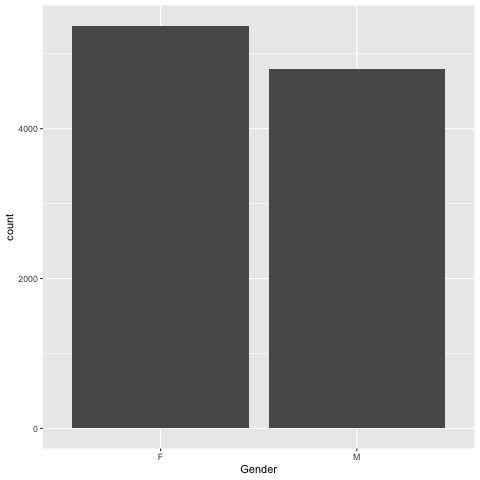

In [35]:
%%R
ggplot(data, aes(x = Gender)) + geom_bar()